# Exploratory Data Analysis (EDA)
## Credit Risk Probability Model - Task 2

This notebook contains exploratory analysis of the Xente transaction data to understand patterns, identify data quality issues, and form hypotheses for feature engineering.

**Objective**: Explore the dataset to uncover patterns, identify data quality issues, and form hypotheses that will guide feature engineering.


## Step 1: Import Libraries and Load Data

**What we're doing**: 
- Importing necessary libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn)
- Loading the raw transaction data
- This is our foundation for all analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('../data/raw/data.csv')

print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")


Data loaded successfully!
Dataset shape: (95662, 16)


## Step 2: Overview of the Data

**What we're doing**:
- Understanding the basic structure: number of rows, columns, and data types
- This tells us the scale of our dataset and what kind of data we're working with
- Helps identify which columns are numerical vs categorical


In [2]:
# Basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nNumber of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n" + "=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
df.head()


DATASET OVERVIEW

Number of rows: 95,662
Number of columns: 16

Memory usage: 66.48 MB

FIRST 5 ROWS


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:
# Data types and basic info
print("=" * 60)
print("DATA TYPES AND COLUMN INFORMATION")
print("=" * 60)
print("\nColumn names and data types:")
print(df.dtypes)

print("\n" + "=" * 60)
print("DETAILED DATASET INFO")
print("=" * 60)
df.info()


DATA TYPES AND COLUMN INFORMATION

Column names and data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

DETAILED DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId    

In [4]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("=" * 60)
print("COLUMN CATEGORIZATION")
print("=" * 60)
print(f"\nNumerical columns ({len(numerical_cols)}):")
print(numerical_cols)
print(f"\nCategorical columns ({len(categorical_cols)}):")
print(categorical_cols)


COLUMN CATEGORIZATION

Numerical columns (5):
['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

Categorical columns (11):
['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


## Step 3: Summary Statistics

**What we're doing**:
- Calculating mean, median, standard deviation, min, max for numerical features
- Understanding central tendency (where most values cluster) and dispersion (how spread out they are)
- This helps identify potential issues like extreme values or skewed distributions


In [4]:
# Summary statistics for numerical columns
# (Make this cell runnable even if you didn't run the earlier column-categorization cell.)
try:
    numerical_cols
except NameError:
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("=" * 60)
print("SUMMARY STATISTICS FOR NUMERICAL FEATURES")
print("=" * 60)
df[numerical_cols].describe()


SUMMARY STATISTICS FOR NUMERICAL FEATURES


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [5]:
# Additional statistics: skewness and kurtosis
print("=" * 60)
print("SKEWNESS AND KURTOSIS")
print("=" * 60)
print("\nSkewness (measure of asymmetry):")
print("  > 0: Right-skewed (tail on right)")
print("  < 0: Left-skewed (tail on left)")
print("  = 0: Symmetric")
print("\nKurtosis (measure of tail heaviness):")
print("  > 3: Heavy tails (more outliers)")
print("  < 3: Light tails (fewer outliers)")
print("  = 3: Normal distribution")

stats_df = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})
print("\n" + stats_df.to_string())


SKEWNESS AND KURTOSIS

Skewness (measure of asymmetry):
  > 0: Right-skewed (tail on right)
  < 0: Left-skewed (tail on left)
  = 0: Symmetric

Kurtosis (measure of tail heaviness):
  > 3: Heavy tails (more outliers)
  < 3: Light tails (fewer outliers)
  = 3: Normal distribution

                  Skewness     Kurtosis
CountryCode       0.000000     0.000000
Amount           51.098490  3363.127739
Value            51.291086  3378.069274
PricingStrategy   1.659057     2.087534
FraudResult      22.196295   490.685762


## Step 4: Distribution of Numerical Features

**What we're doing**:
- Creating histograms and density plots to visualize how numerical values are distributed
- Identifying skewness (asymmetric distributions) which may need transformation
- Spotting potential outliers (extreme values that don't fit the pattern)
- This helps us decide if we need to normalize or transform features later


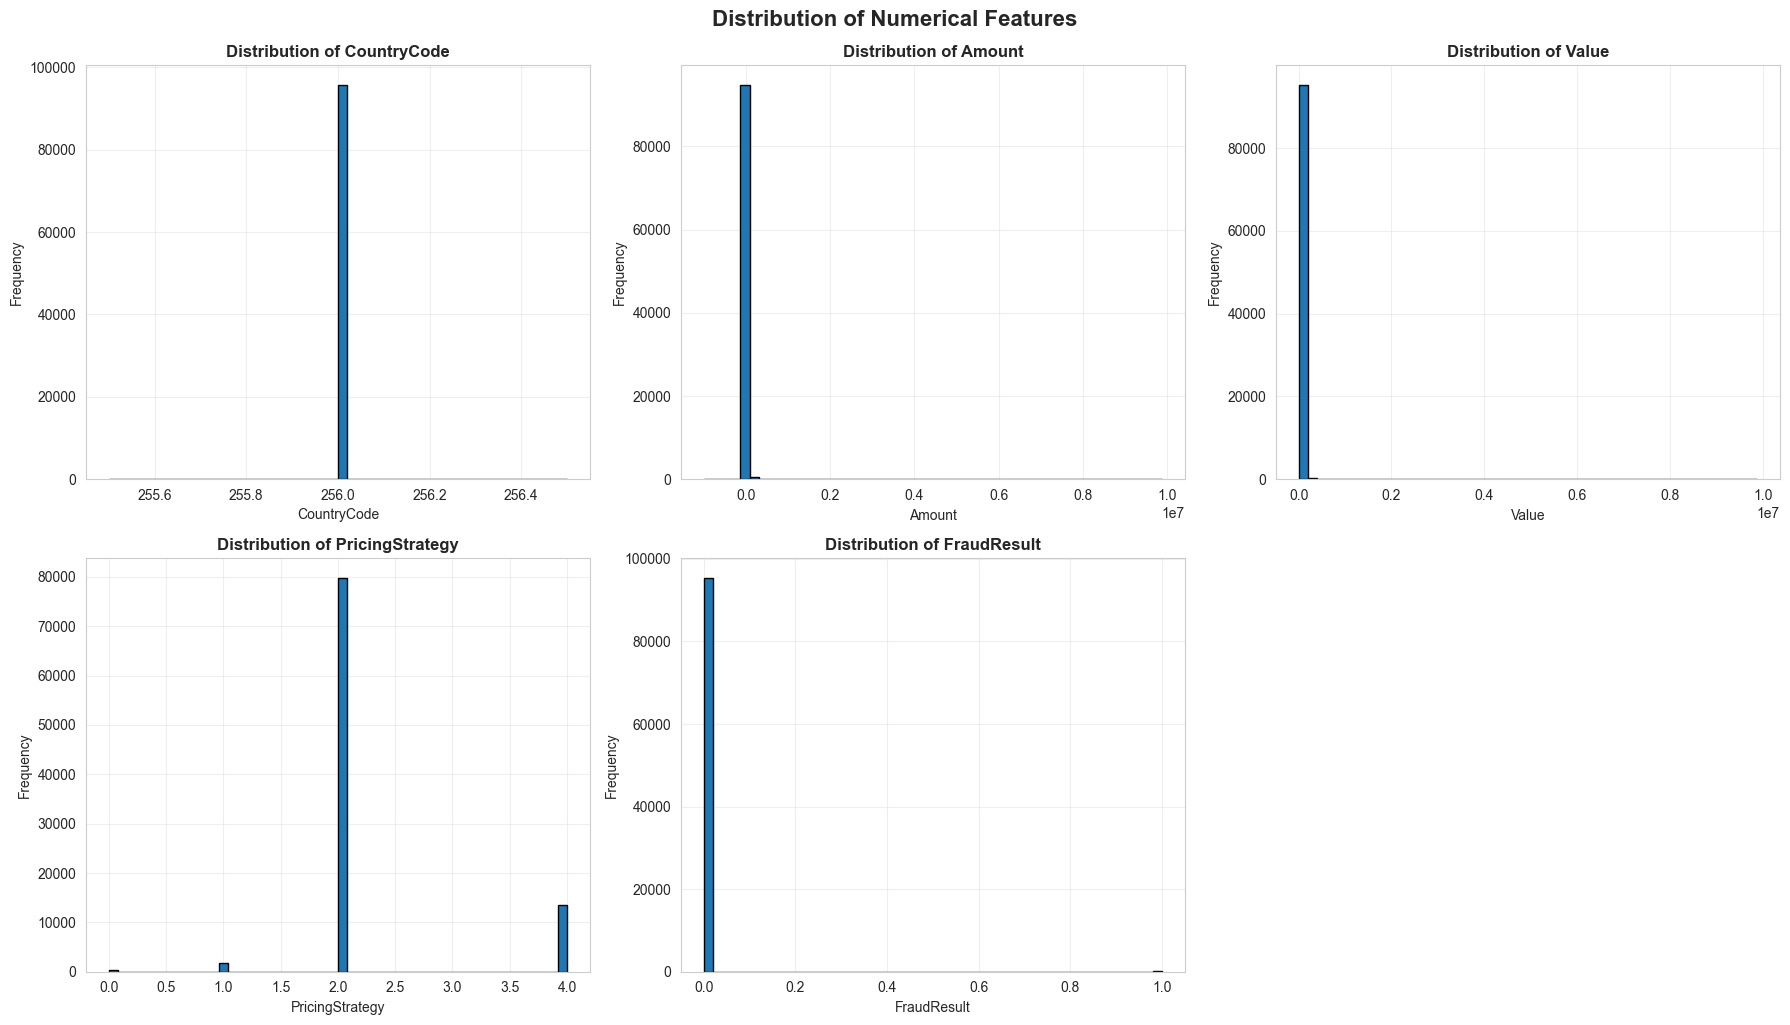

In [6]:
# Plot distributions for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()


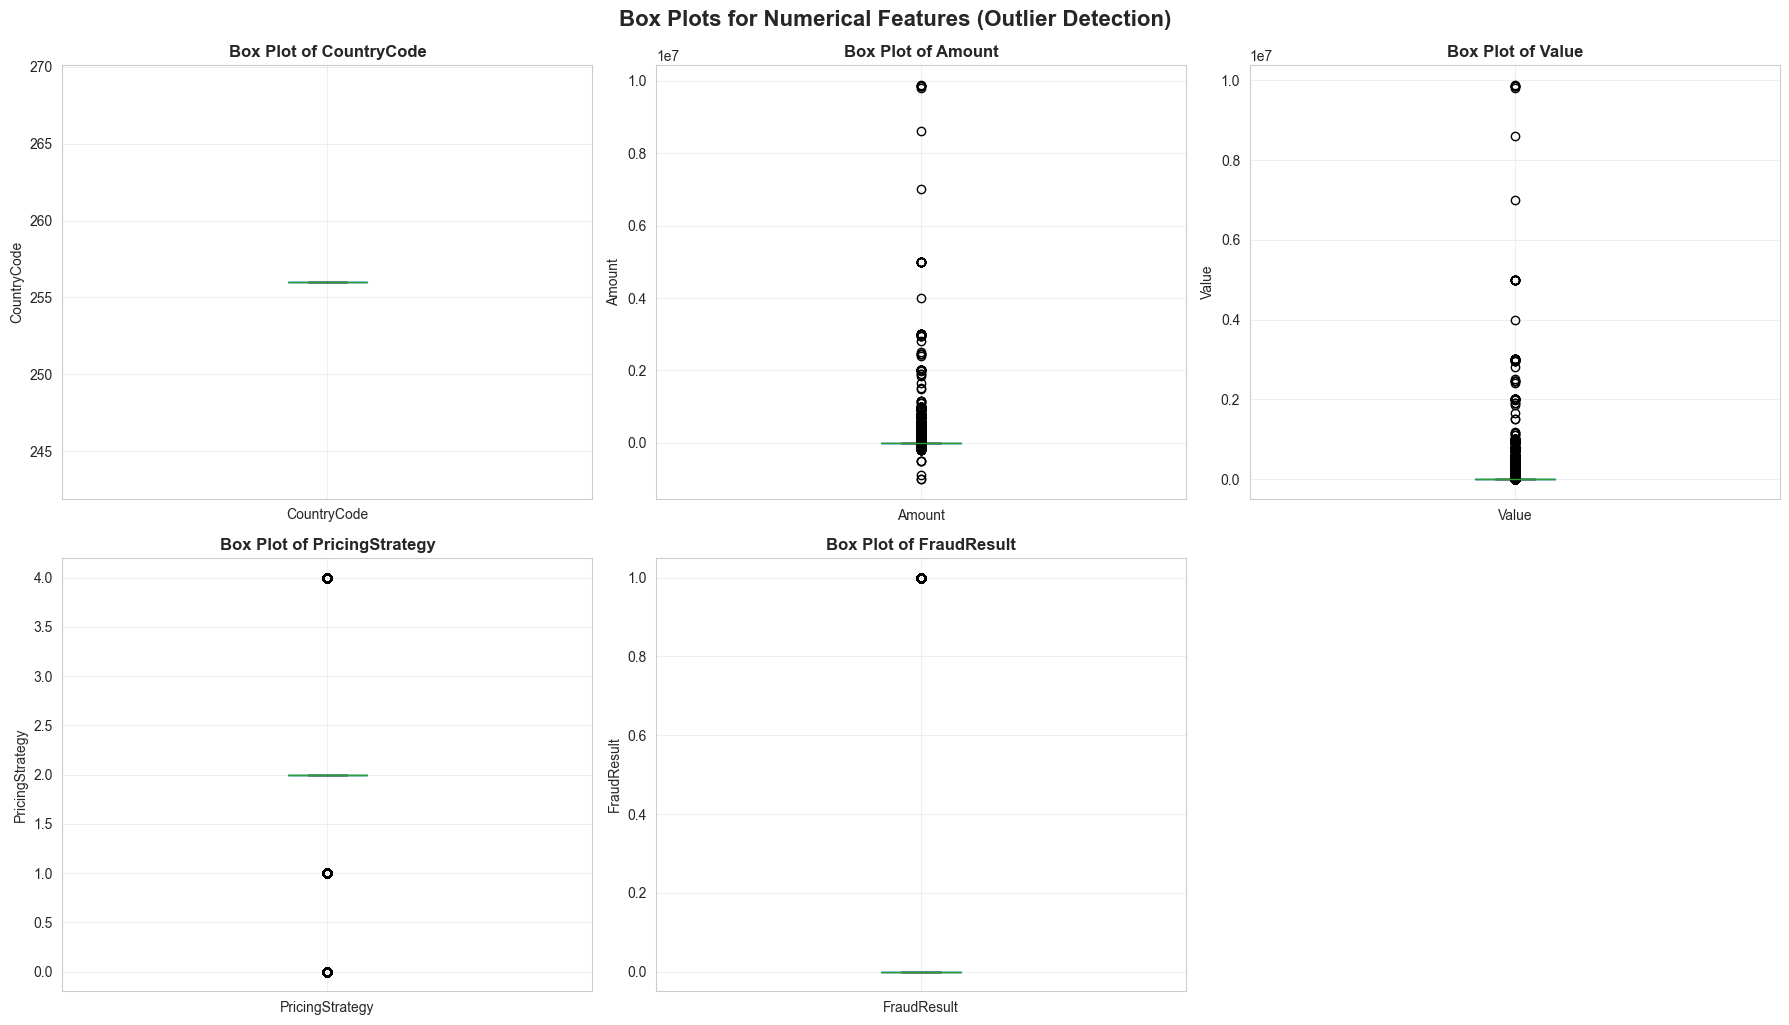

In [7]:
# Box plots to visualize distributions and outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Box Plots for Numerical Features (Outlier Detection)', fontsize=16, fontweight='bold', y=1.02)
plt.show()


## Step 5: Distribution of Categorical Features

**What we're doing**:
- Counting how many times each category appears (frequency)
- Identifying the most common and rare categories
- Understanding if categories are balanced or imbalanced
- This helps us decide on encoding strategies and identify potential issues


In [9]:
# Analyze categorical features
# (Make this cell runnable even if you didn't run the earlier column-categorization cell.)
try:
    categorical_cols
except NameError:
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent value: {df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"  Frequency of most common: {df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0}")
    print(f"\n  Top 10 values:")
    print(df[col].value_counts().head(10).to_string())
    print("-" * 60)


CATEGORICAL FEATURES ANALYSIS

TransactionId:
  Unique values: 95662
  Most frequent value: TransactionId_1
  Frequency of most common: 1

  Top 10 values:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
------------------------------------------------------------

BatchId:
  Unique values: 94809
  Most frequent value: BatchId_67019
  Frequency of most common: 28

  Top 10 values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
------------------------------------------------------------

AccountId:
  Unique values: 3633
  Most frequent value: AccountId_4841
  Frequency of most common: 30893

  To

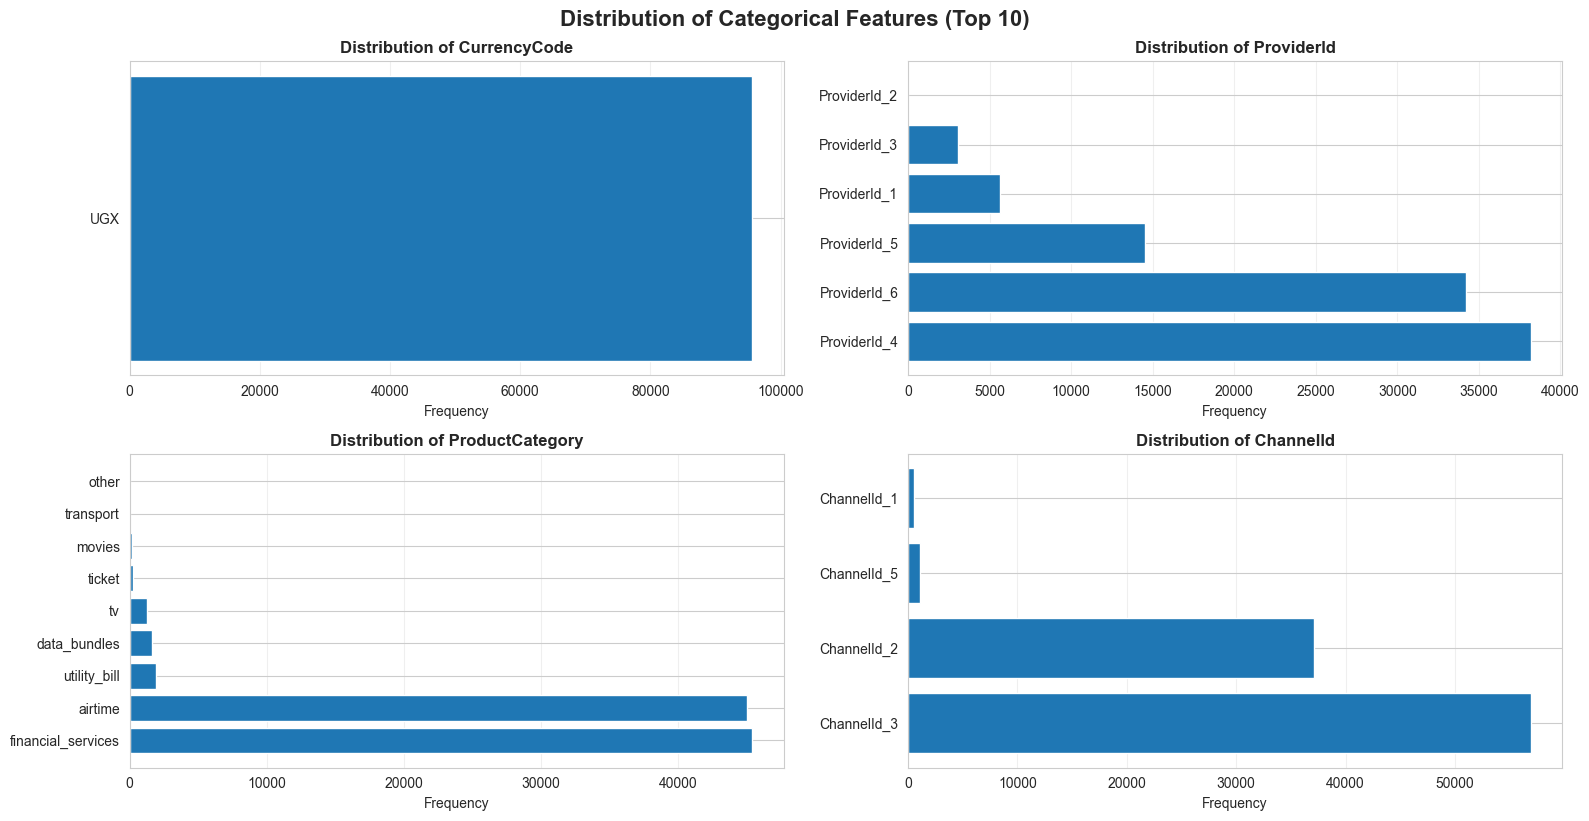

In [10]:
# Visualize categorical feature distributions
# (Make this cell runnable even if you didn't run the earlier column-categorization cell.)
try:
    categorical_cols
except NameError:
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Select categorical columns with reasonable number of unique values for visualization
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 20]

n_cols = len(cat_cols_to_plot)
if n_cols > 0:
    fig, axes = plt.subplots((n_cols + 1) // 2, 2, figsize=(16, 4 * ((n_cols + 1) // 2)))
    if n_cols == 1:
        axes = [axes]
    else:
        axes = axes.ravel()

    for idx, col in enumerate(cat_cols_to_plot):
        value_counts = df[col].value_counts().head(10)  # Top 10 only
        axes[idx].barh(range(len(value_counts)), value_counts.values)
        axes[idx].set_yticks(range(len(value_counts)))
        axes[idx].set_yticklabels(value_counts.index)
        axes[idx].set_xlabel('Frequency')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3, axis='x')

    # Hide empty subplots
    for idx in range(len(cat_cols_to_plot), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.suptitle('Distribution of Categorical Features (Top 10)', fontsize=16, fontweight='bold', y=1.02)
    plt.show()
else:
    print("No categorical columns with <= 20 unique values to visualize")


## Step 6: Correlation Analysis

**What we're doing**:
- Calculating correlation coefficients between numerical features
- Correlation ranges from -1 to +1:
  - +1: Perfect positive correlation (both increase together)
  - -1: Perfect negative correlation (one increases, other decreases)
  - 0: No correlation
- High correlations (>0.7 or <-0.7) might indicate redundant features
- This helps us identify which features might be good predictors


In [11]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("=" * 60)
print("CORRELATION MATRIX")
print("=" * 60)
print(correlation_matrix)


CORRELATION MATRIX
                 CountryCode    Amount     Value  PricingStrategy  FraudResult
CountryCode              NaN       NaN       NaN              NaN          NaN
Amount                   NaN  1.000000  0.989692        -0.061931     0.557370
Value                    NaN  0.989692  1.000000        -0.017020     0.566739
PricingStrategy          NaN -0.061931 -0.017020         1.000000    -0.033821
FraudResult              NaN  0.557370  0.566739        -0.033821     1.000000


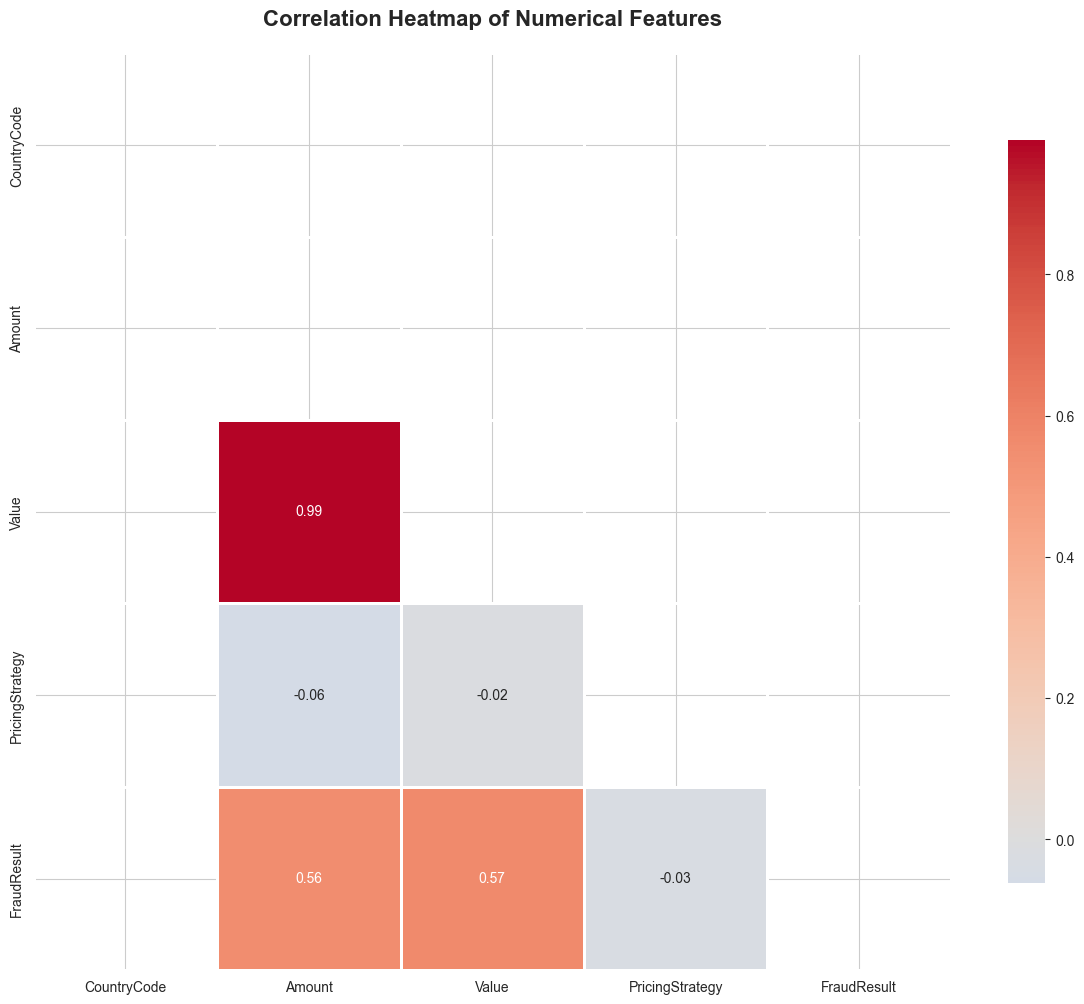

In [12]:
# Visualize correlation matrix as heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [13]:
# Find highly correlated feature pairs
print("=" * 60)
print("HIGHLY CORRELATED FEATURE PAIRS")
print("=" * 60)
print("(Absolute correlation > 0.7)")

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated pairs found (|correlation| > 0.7)")


HIGHLY CORRELATED FEATURE PAIRS
(Absolute correlation > 0.7)
Feature 1 Feature 2  Correlation
   Amount     Value     0.989692


## Step 7: Identifying Missing Values

**What we're doing**:
- Counting how many missing/null values exist in each column
- Calculating the percentage of missing data
- Deciding on imputation strategies:
  - If <5% missing: Can impute with mean/median/mode
  - If 5-30% missing: Need careful imputation strategy
  - If >30% missing: Might need to drop the column or use advanced techniques
- Missing data can bias our model if not handled properly


In [14]:
# Check for missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

if len(missing_data) > 0:
    print("\nColumns with missing values:")
    print(missing_data.to_string(index=False))
else:
    print("\n✅ No missing values found in the dataset!")

# Overall missing data summary
total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\nTotal missing values: {total_missing:,} out of {total_cells:,} cells ({total_missing/total_cells*100:.2f}%)")


MISSING VALUES ANALYSIS

✅ No missing values found in the dataset!

Total missing values: 0 out of 1,530,592 cells (0.00%)


In [15]:
# Visualize missing values if any exist
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
    
    plt.barh(range(len(missing_counts)), missing_counts.values)
    plt.yticks(range(len(missing_counts)), missing_counts.index)
    plt.xlabel('Number of Missing Values')
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize.")


No missing values to visualize.


## Step 8: Outlier Detection

**What we're doing**:
- Using box plots and statistical methods (IQR method) to identify outliers
- Outliers are values that are significantly different from other observations
- They can:
  - Skew our model's predictions
  - Represent errors in data collection
  - Or be genuine extreme cases (e.g., very high-value transactions)
- We need to decide: remove them, transform them, or keep them (if they're meaningful)


In [16]:
# Statistical outlier detection using IQR method
print("=" * 60)
print("OUTLIER DETECTION USING IQR METHOD")
print("=" * 60)
print("\nIQR (Interquartile Range) Method:")
print("  - Q1 (25th percentile) and Q3 (75th percentile)")
print("  - IQR = Q3 - Q1")
print("  - Outliers: values < Q1 - 1.5*IQR or > Q3 + 1.5*IQR")
print("\n" + "=" * 60)

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier Percentage': f"{outlier_percentage:.2f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION USING IQR METHOD

IQR (Interquartile Range) Method:
  - Q1 (25th percentile) and Q3 (75th percentile)
  - IQR = Q3 - Q1
  - Outliers: values < Q1 - 1.5*IQR or > Q3 + 1.5*IQR

         Column    Q1     Q3    IQR  Lower Bound  Upper Bound  Outlier Count Outlier Percentage
    CountryCode 256.0  256.0    0.0        256.0        256.0              0              0.00%
         Amount -50.0 2800.0 2850.0      -4325.0       7075.0          24441             25.55%
          Value 275.0 5000.0 4725.0      -6812.5      12087.5           9021              9.43%
PricingStrategy   2.0    2.0    0.0          2.0          2.0          15814             16.53%
    FraudResult   0.0    0.0    0.0          0.0          0.0            193              0.20%


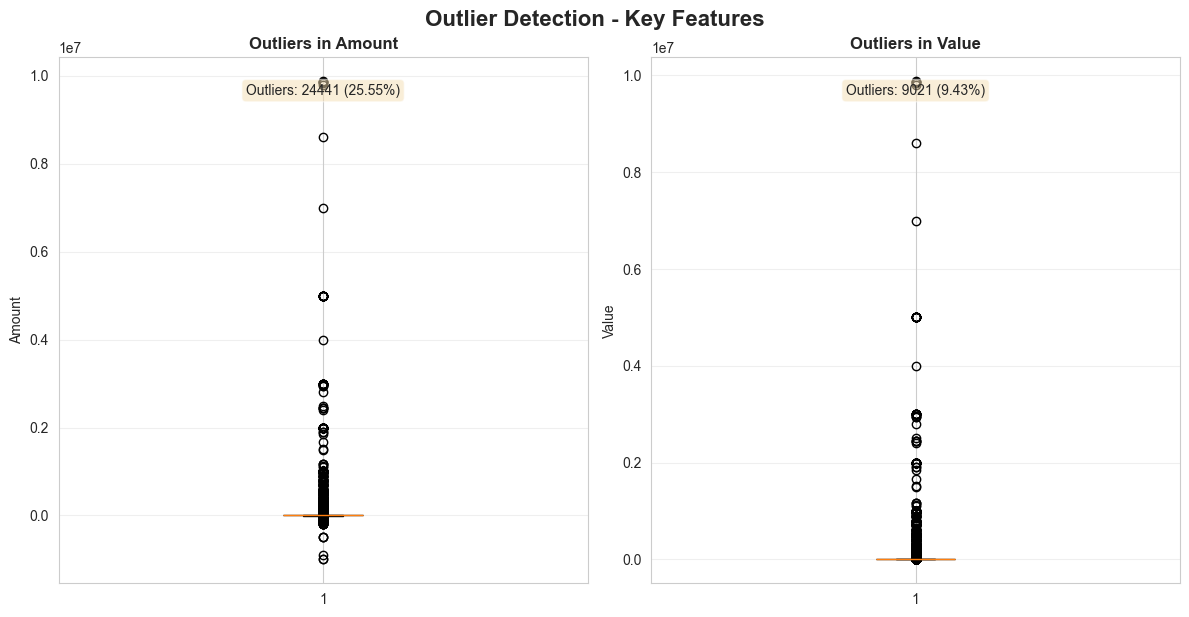

In [17]:
# Visualize outliers for key numerical columns (Amount and Value are most important)
key_cols = ['Amount', 'Value'] if 'Amount' in numerical_cols and 'Value' in numerical_cols else numerical_cols[:2]

fig, axes = plt.subplots(1, len(key_cols), figsize=(6*len(key_cols), 6))
if len(key_cols) == 1:
    axes = [axes]

for idx, col in enumerate(key_cols):
    # Create box plot
    bp = axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[idx].set_title(f'Outliers in {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add statistics text
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = len(df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)])
    axes[idx].text(0.5, 0.95, f'Outliers: {outlier_count} ({outlier_count/len(df)*100:.2f}%)',
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.suptitle('Outlier Detection - Key Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()


## Step 9: Time-Based Analysis

**What we're doing**:
- Analyzing transaction patterns over time
- Extracting date/time features (hour, day, month, year) which will be useful for feature engineering
- Understanding temporal patterns can reveal:
  - Peak transaction times
  - Seasonal trends
  - Customer behavior patterns


TIME-BASED ANALYSIS

Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
Total time span: 90 days

TRANSACTIONS BY HOUR OF DAY
TransactionHour
0      168
1      176
2      289
3      714
4     2329
5     4161
6     5325
7     5723
8     5639
9     5443
10    5986
11    6226
12    5262
13    5224
14    5179
15    6285
16    7306
17    7291
18    6332
19    5132
20    3026
21    1479
22     683
23     284


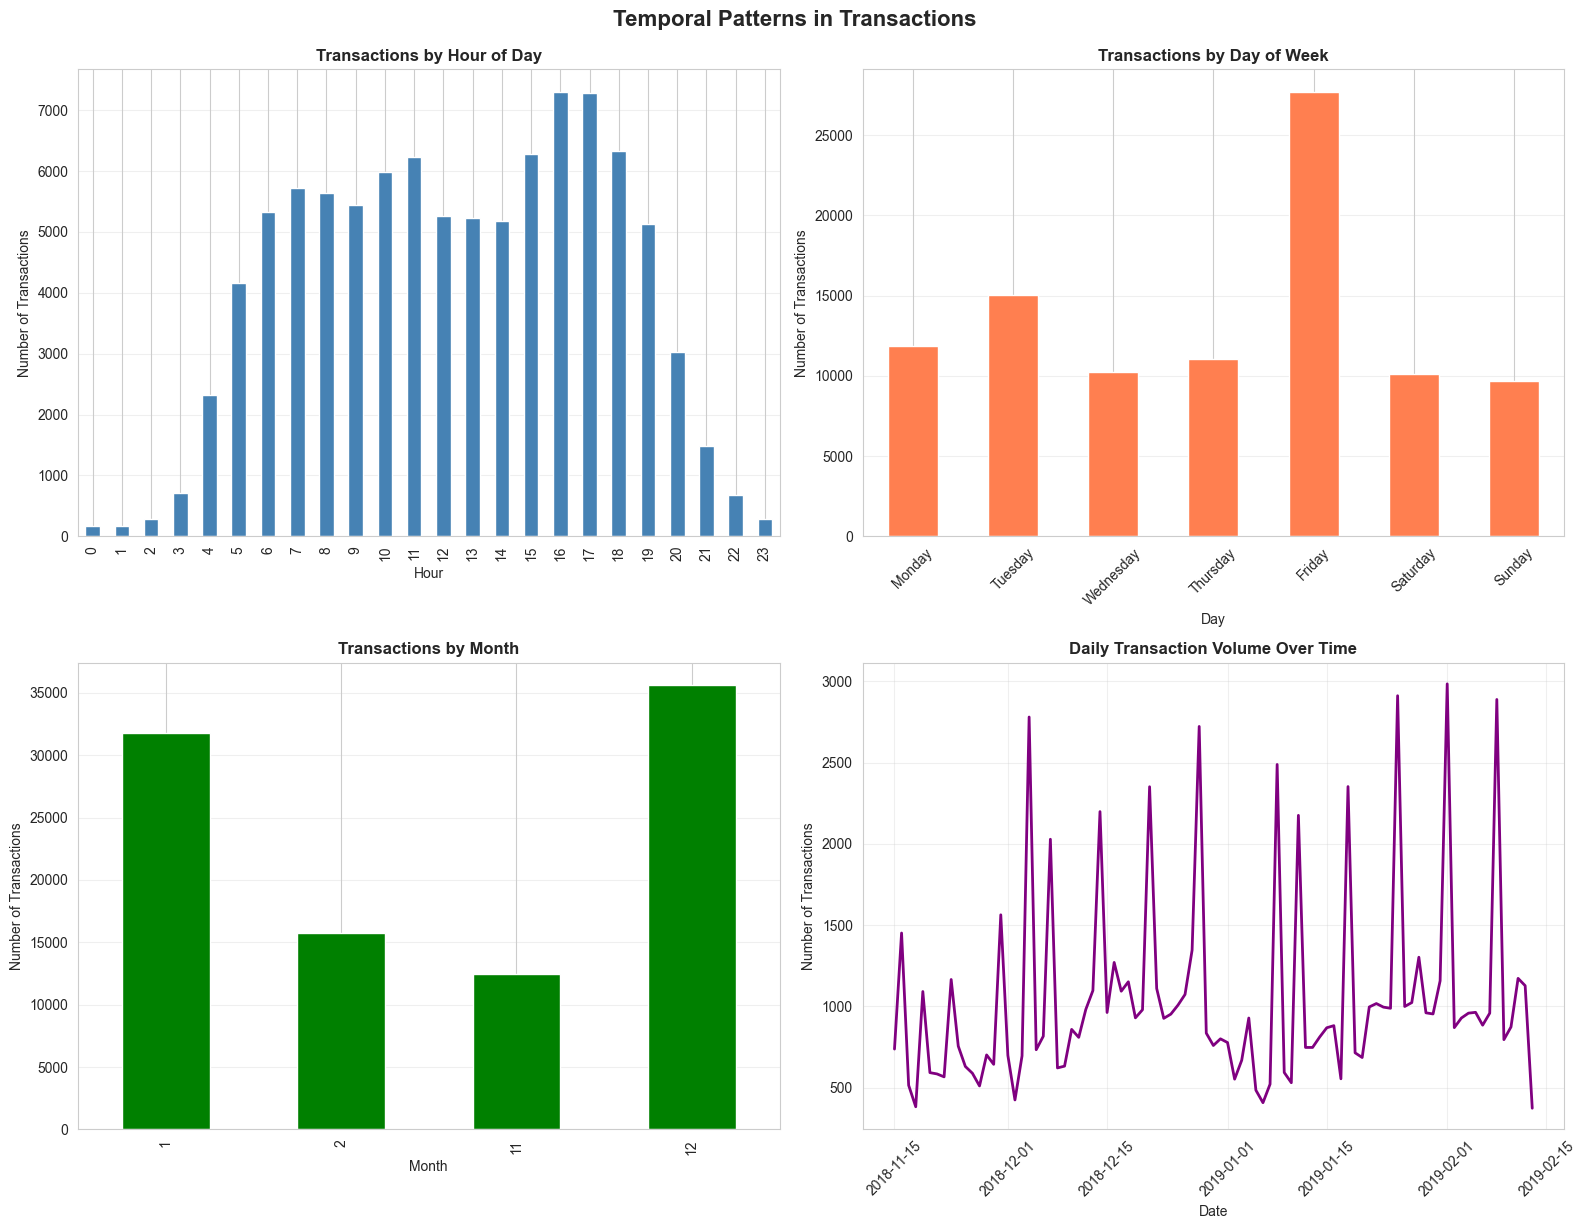

In [18]:
# Convert TransactionStartTime to datetime
if 'TransactionStartTime' in df.columns:
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract time features
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDay'] = df['TransactionStartTime'].dt.day
    df['TransactionMonth'] = df['TransactionStartTime'].dt.month
    df['TransactionYear'] = df['TransactionStartTime'].dt.year
    df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
    df['TransactionDayName'] = df['TransactionStartTime'].dt.day_name()
    
    print("=" * 60)
    print("TIME-BASED ANALYSIS")
    print("=" * 60)
    print(f"\nDate range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")
    print(f"Total time span: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days} days")
    
    # Transaction distribution by hour
    print("\n" + "=" * 60)
    print("TRANSACTIONS BY HOUR OF DAY")
    print("=" * 60)
    hourly_counts = df['TransactionHour'].value_counts().sort_index()
    print(hourly_counts.to_string())
    
    # Visualize transaction patterns
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Transactions by hour
    hourly_counts.plot(kind='bar', ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title('Transactions by Hour of Day', fontweight='bold')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Number of Transactions')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Transactions by day of week
    day_counts = df['TransactionDayName'].value_counts()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = day_counts.reindex([d for d in day_order if d in day_counts.index])
    day_counts.plot(kind='bar', ax=axes[0, 1], color='coral')
    axes[0, 1].set_title('Transactions by Day of Week', fontweight='bold')
    axes[0, 1].set_xlabel('Day')
    axes[0, 1].set_ylabel('Number of Transactions')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3, axis='y')
    
    # Transactions by month
    month_counts = df['TransactionMonth'].value_counts().sort_index()
    month_counts.plot(kind='bar', ax=axes[1, 0], color='green')
    axes[1, 0].set_title('Transactions by Month', fontweight='bold')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Number of Transactions')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    # Transactions over time (daily)
    daily_counts = df.groupby(df['TransactionStartTime'].dt.date).size()
    daily_counts.plot(ax=axes[1, 1], color='purple', linewidth=2)
    axes[1, 1].set_title('Daily Transaction Volume Over Time', fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Number of Transactions')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Temporal Patterns in Transactions', fontsize=16, fontweight='bold', y=1.02)
    plt.show()
else:
    print("TransactionStartTime column not found")


## Step 10: Summary of Key Insights

**What we're doing**:
- Synthesizing all our findings into actionable insights
- Identifying the most important patterns that will guide feature engineering
- Highlighting data quality issues that need to be addressed
- Forming hypotheses about which features might be good predictors of credit risk


### Top 3-5 Most Important Insights

Based on the exploratory data analysis, here are the key findings that will guide our feature engineering and model development:

#### Insight 1: [To be filled after running analysis]
**Finding**: 
**Implication for Feature Engineering**: 
**Impact on Model**: 

#### Insight 2: [To be filled after running analysis]
**Finding**: 
**Implication for Feature Engineering**: 
**Impact on Model**: 

#### Insight 3: [To be filled after running analysis]
**Finding**: 
**Implication for Feature Engineering**: 
**Impact on Model**: 

#### Insight 4: [To be filled after running analysis]
**Finding**: 
**Implication for Feature Engineering**: 
**Impact on Model**: 

#### Insight 5: [To be filled after running analysis]
**Finding**: 
**Implication for Feature Engineering**: 
**Impact on Model**: 


In [19]:
# Generate summary statistics for insights
print("=" * 60)
print("KEY STATISTICS SUMMARY")
print("=" * 60)

print(f"\n1. Dataset Scale:")
print(f"   - Total transactions: {len(df):,}")
print(f"   - Unique customers: {df['CustomerId'].nunique() if 'CustomerId' in df.columns else 'N/A':,}")
print(f"   - Date range: {df['TransactionStartTime'].min() if 'TransactionStartTime' in df.columns else 'N/A'} to {df['TransactionStartTime'].max() if 'TransactionStartTime' in df.columns else 'N/A'}")

print(f"\n2. Transaction Amounts:")
if 'Amount' in df.columns:
    print(f"   - Mean transaction amount: {df['Amount'].mean():.2f}")
    print(f"   - Median transaction amount: {df['Amount'].median():.2f}")
    print(f"   - Standard deviation: {df['Amount'].std():.2f}")
    print(f"   - Min: {df['Amount'].min():.2f}, Max: {df['Amount'].max():.2f}")

print(f"\n3. Data Quality:")
print(f"   - Missing values: {df.isnull().sum().sum():,} ({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}%)")
print(f"   - Duplicate transactions: {df.duplicated().sum():,}")

print(f"\n4. Categorical Features:")
if 'ProductCategory' in df.columns:
    print(f"   - Product categories: {df['ProductCategory'].nunique()}")
    print(f"   - Most common category: {df['ProductCategory'].mode()[0] if len(df['ProductCategory'].mode()) > 0 else 'N/A'}")
if 'ChannelId' in df.columns:
    print(f"   - Channels: {df['ChannelId'].nunique()}")

print(f"\n5. Fraud Detection:")
if 'FraudResult' in df.columns:
    fraud_rate = df['FraudResult'].mean() * 100
    print(f"   - Fraud rate: {fraud_rate:.2f}%")
    print(f"   - Fraudulent transactions: {df['FraudResult'].sum():,}")

print("\n" + "=" * 60)
print("END OF EDA")
print("=" * 60)


KEY STATISTICS SUMMARY

1. Dataset Scale:
   - Total transactions: 95,662
   - Unique customers: 3,742
   - Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00

2. Transaction Amounts:
   - Mean transaction amount: 6717.85
   - Median transaction amount: 1000.00
   - Standard deviation: 123306.80
   - Min: -1000000.00, Max: 9880000.00

3. Data Quality:
   - Missing values: 0 (0.00%)
   - Duplicate transactions: 0

4. Categorical Features:
   - Product categories: 9
   - Most common category: financial_services
   - Channels: 4

5. Fraud Detection:
   - Fraud rate: 0.20%
   - Fraudulent transactions: 193

END OF EDA
